In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\HP\OneDrive - vitbhopal.ac.in\documents\EPICS_Project\datasets\fertilizer_prediction.csv")

In [3]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [4]:
df.sample(10)

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
78,26,52,36,Clayey,Pulses,7,16,20,10-26-26
3,32,62,34,Red,Tobacco,22,0,20,28-28
19,29,58,52,Loamy,Wheat,13,0,36,DAP
81,30,60,40,Sandy,Millets,41,0,0,Urea
25,26,52,44,Sandy,Maize,23,0,20,28-28
87,27,53,30,Black,Millets,35,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP
0,26,52,38,Sandy,Maize,37,0,0,Urea
65,36,68,62,Red,Cotton,15,0,40,DAP
39,29,58,34,Sandy,Millets,15,0,37,DAP


In [5]:
df.shape

(99, 9)

In [6]:
df["Fertilizer Name"].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [7]:
df['Fertilizer Name'].value_counts()

Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: Fertilizer Name, dtype: int64

In [8]:
df.nunique()

Temparature        14
Humidity           13
Moisture           41
Soil Type           5
Crop Type          11
Nitrogen           24
Potassium          13
Phosphorous        32
Fertilizer Name     7
dtype: int64

In [9]:
df["Soil Type"].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [10]:
df["Crop Type"].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [11]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [13]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


## Data Preprocessing 

<Figure size 2100x1700 with 0 Axes>

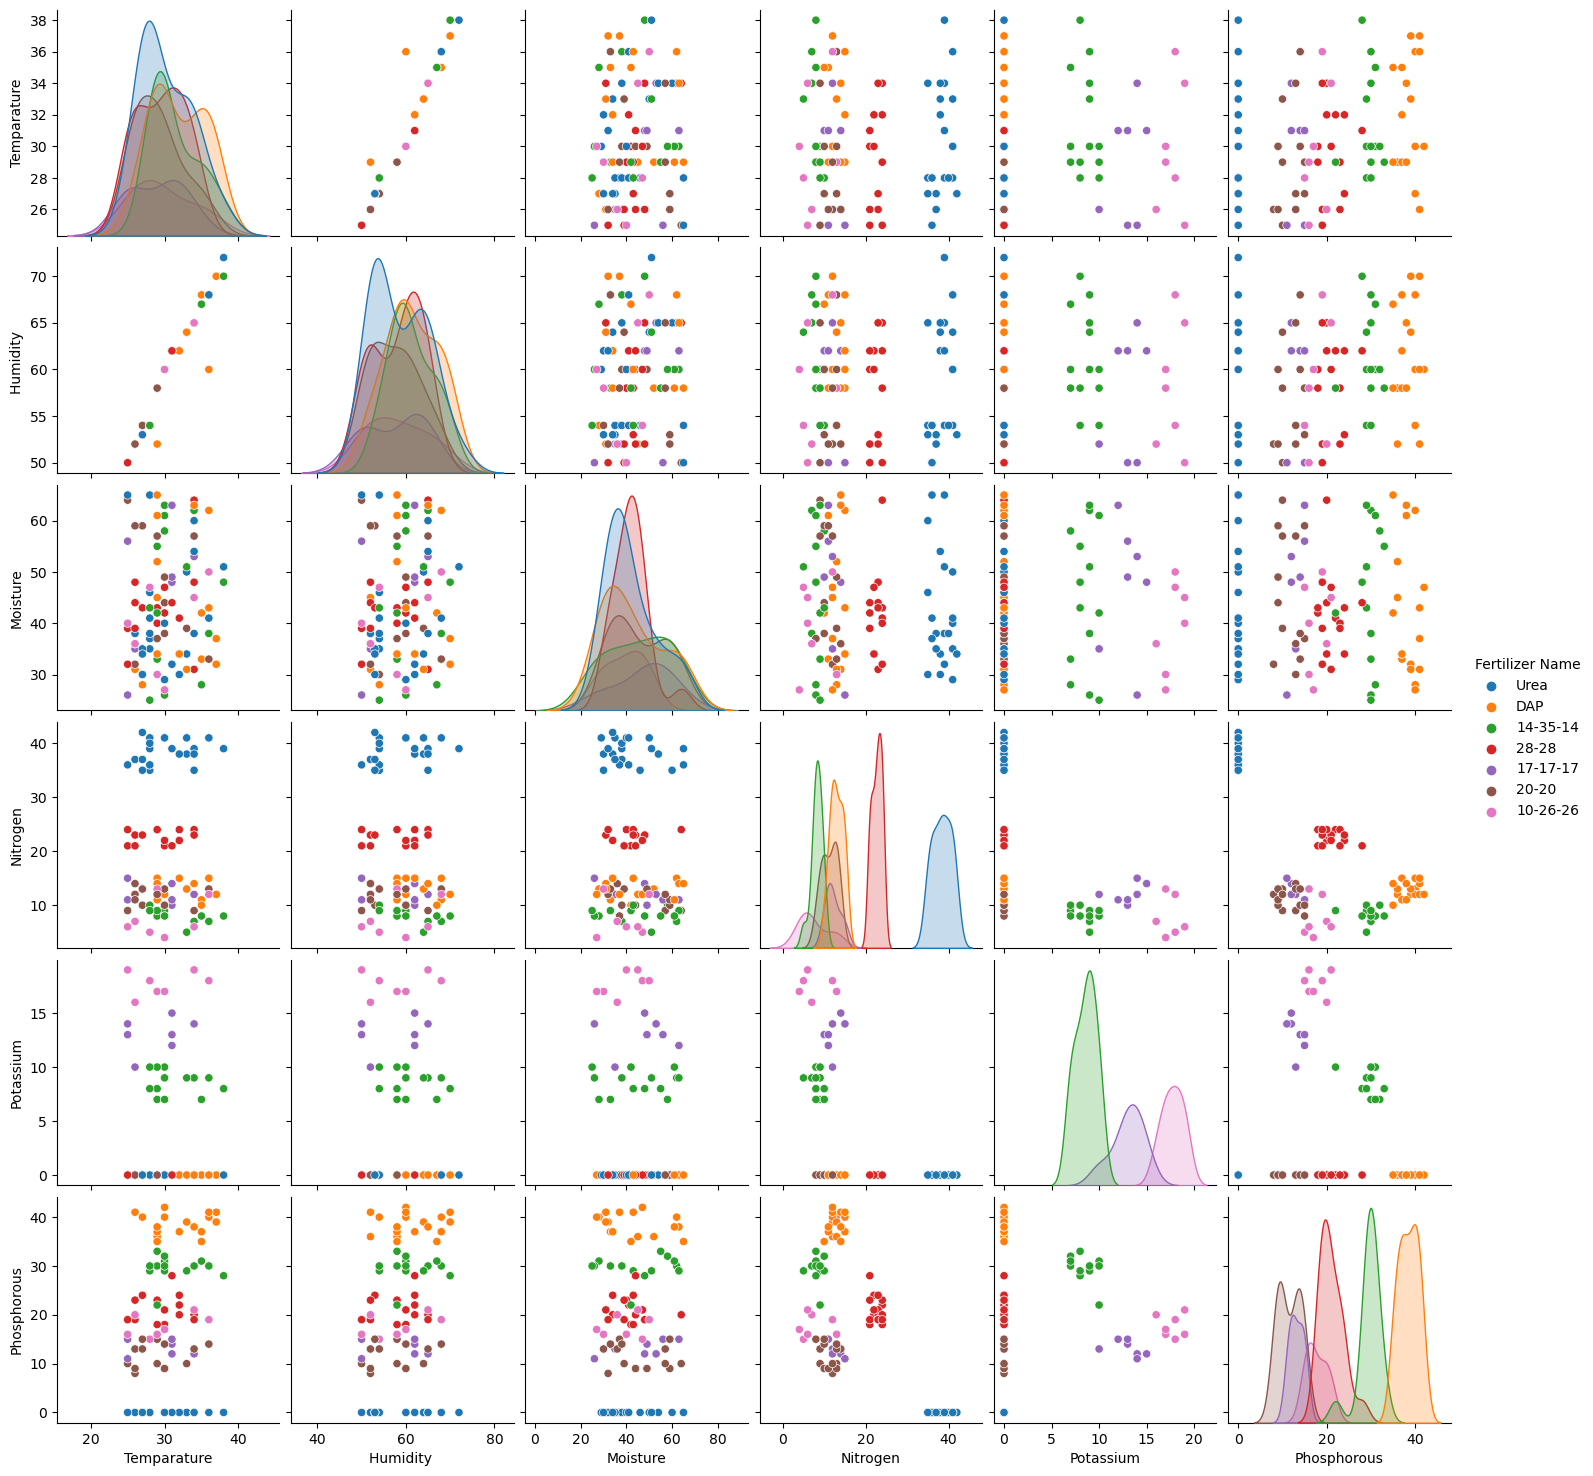

In [14]:
#This is will give the pairplot of numerical data columns

plt.figure(figsize=(21,17))
sns.pairplot(df,hue = "Fertilizer Name")
plt.show()

array([[<Axes: title={'center': 'Temparature'}>,
        <Axes: title={'center': 'Humidity '}>],
       [<Axes: title={'center': 'Moisture'}>,
        <Axes: title={'center': 'Nitrogen'}>],
       [<Axes: title={'center': 'Potassium'}>,
        <Axes: title={'center': 'Phosphorous'}>]], dtype=object)

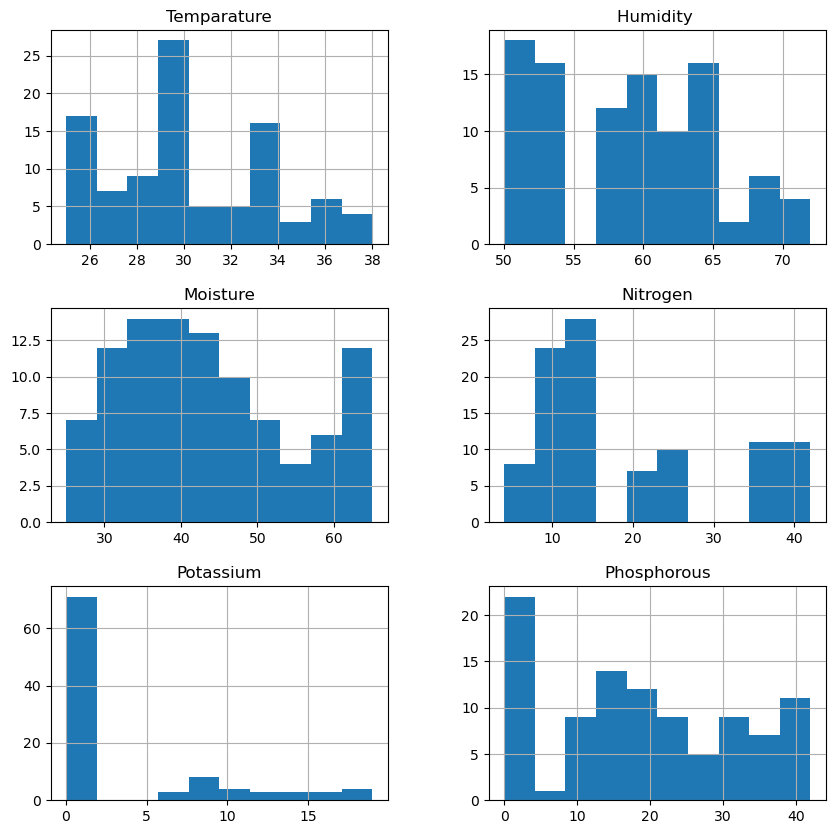

In [15]:
df.hist(figsize=(10,10))

### Checking numercial and categorical colums

In [16]:
#For numerical columns
num_cols = [col for col in df.columns if df[col].dtypes!='O']
num_cols

['Temparature',
 'Humidity ',
 'Moisture',
 'Nitrogen',
 'Potassium',
 'Phosphorous']

In [17]:
#For categorical colums
cat_cols = [col for col in df.columns if df[col].dtypes=='O']
cat_cols

['Soil Type', 'Crop Type', 'Fertilizer Name']

In [18]:
# Removing 'Fertilizer Name' from list as it is the target variable
cat_cols.remove('Fertilizer Name')
cat_cols

['Soil Type', 'Crop Type']

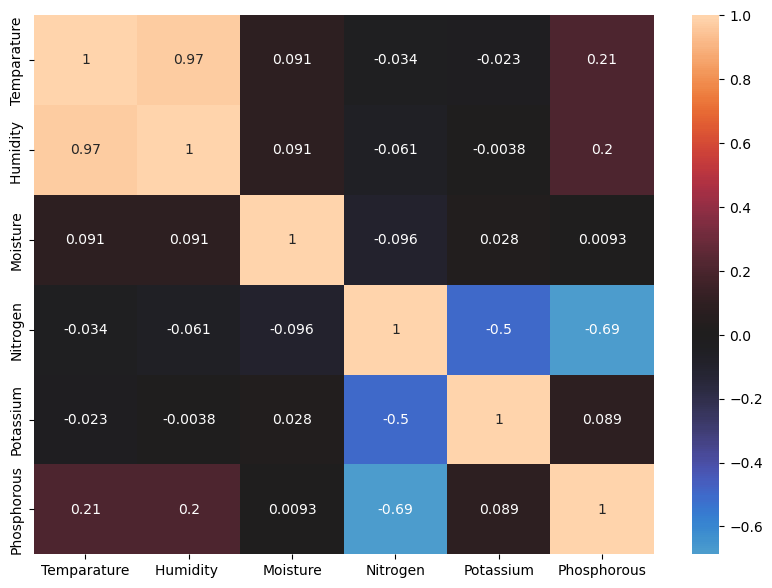

In [19]:
plt.figure(figsize = (10,7))
sns.heatmap(df[num_cols].corr(), center = 0, annot = True)
plt.show()

In [20]:
soil_type_label_encoder = LabelEncoder()
df["Soil Type"] = soil_type_label_encoder.fit_transform(df["Soil Type"])

In [21]:
df['Soil Type'].unique()

array([4, 2, 0, 3, 1])

In [22]:
crop_type_label_encoder = LabelEncoder()
df['Crop Type'] = crop_type_label_encoder.fit_transform(df["Crop Type"])

In [23]:
df["Crop Type"].unique()

array([ 3,  8,  1,  9,  6,  0, 10,  4,  5,  7,  2])

In [24]:
croptype_dict = {}
for i in range(len(df["Crop Type"].unique())):
    croptype_dict[i] = crop_type_label_encoder.inverse_transform([i])[0]
print(croptype_dict)

{0: 'Barley', 1: 'Cotton', 2: 'Ground Nuts', 3: 'Maize', 4: 'Millets', 5: 'Oil seeds', 6: 'Paddy', 7: 'Pulses', 8: 'Sugarcane', 9: 'Tobacco', 10: 'Wheat'}


In [25]:
soiltype_dict = {}
for i in range(len(df["Soil Type"].unique())):
    soiltype_dict[i] = soil_type_label_encoder.inverse_transform([i])[0]
print(soiltype_dict)

{0: 'Black', 1: 'Clayey', 2: 'Loamy', 3: 'Red', 4: 'Sandy'}


In [26]:
fertname_label_encoder = LabelEncoder()
df["Fertilizer Name"] = fertname_label_encoder.fit_transform(df["Fertilizer Name"])

fertname_dict = {}
for i in range(len(df["Fertilizer Name"].unique())):
    fertname_dict[i] = fertname_label_encoder.inverse_transform([i])[0]
print(fertname_dict)

{0: '10-26-26', 1: '14-35-14', 2: '17-17-17', 3: '20-20', 4: '28-28', 5: 'DAP', 6: 'Urea'}


In [27]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,6
1,29,52,45,2,8,12,0,36,5
2,34,65,62,0,1,7,9,30,1
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,6


In [28]:
Y = df['Fertilizer Name']
X = df.drop(['Fertilizer Name'], axis=1)

### Train-Test Split

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

In [30]:
print('X_train shape:',X_train.shape)
print('Y_train shape:',Y_train.shape)
print('X_test shape:',X_test.shape)
print('Y_test shape:',Y_test.shape)

X_train shape: (79, 8)
Y_train shape: (79,)
X_test shape: (20, 8)
Y_test shape: (20,)


### Model Training

In [31]:
acc = []
model = []

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
predicted_values = rf.predict(X_test)
x = metrics.accuracy_score(Y_test, predicted_values)

print("Accuracy Score is :",x*100)
print(classification_report(Y_test,predicted_values))

acc.append(x)
model.append("Random Forest")

Accuracy Score is : 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [33]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)
LogReg.fit(X_train,Y_train)
predicted_values = LogReg.predict(X_test)
x = metrics.accuracy_score(Y_test, predicted_values)

print("Accuracy score is :",x*100)
print(classification_report(Y_test,predicted_values))

acc.append(x)
model.append('Logicistic Regression')


Accuracy score is : 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [34]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion='entropy', random_state=2, max_depth=5)
DecisionTree.fit(X_train, Y_train)
predicted_values = DecisionTree.predict(X_test)
x=metrics.accuracy_score(Y_test, predicted_values)

print("Accuracy score is :",x*100)
print(classification_report(Y_test,predicted_values))

acc.append(x)
model.append('Decision Tree')

Accuracy score is : 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [35]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)
predicted_values = classifier.predict(X_test)
x=metrics.accuracy_score(Y_test, predicted_values)

print("Accuracy score is :",x*100)
print(classification_report(Y_test,predicted_values))

acc.append(x)
model.append('Decision Tree')

Accuracy score is : 90.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           0.90        20
   macro avg       0.72      0.83      0.75        20
weighted avg       0.87      0.90      0.88        20



<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

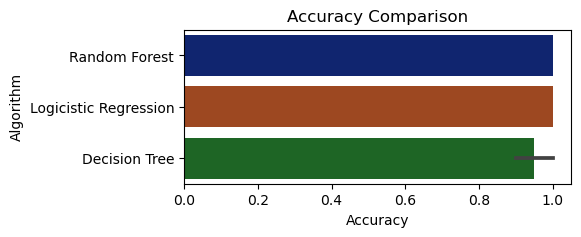

In [36]:
plt.figure(figsize=[5,2],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [37]:
def pred_function(n):
    dictionary = {0: '10-26-26', 1: '14-35-14', 2: '17-17-17', 3: '20-20', 4: '28-28', 5: 'DAP', 6: 'Urea'}
    return dictionary.get(n)

In [42]:
data = np.array([[26,52,38,4,3,37,0,0]])
prediction = LogReg.predict(data)
print(pred_function(prediction[0]))

Urea


### Importing and Installing all dependencies

!pip install -U ibm-watson-machine-learning

from ibm_watson_machine_learning import APIClient
import json
import numpy as np

### Pickling

In [39]:
import pickle

LR_pkl_file = '../models/LogisticRegressiont.pkl'
LR_model_pkl = open(LR_pkl_file, 'wb')
pickle.dump(LogReg, LR_model_pkl)
LR_model_pkl.close()